# Online Food Order Prediction


### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## Problem statement
- The goal is to develop a machine learning-based system for predicting online food orders, leveraging customer data to enhance the efficiency of food delivery services provided by companies like Swiggy and Zomato. By accurately predicting customer behavior and identifying high-demand areas, the system aims to optimize resource allocation and improve delivery times.


- Dataset Source - https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv

##  Understanding the dataset

In [4]:
# Import dependencies
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the .csv data as Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv')

In [6]:
# Show Top 5 Records
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [7]:
# Shape of the dataset
df.shape

(388, 13)

The dataset has 388 records and 13 features

# Dataset information

- > Age : the age of the customer
- > Gender : sex of the customer
- > Marital Status : the customer is either married or single
- > Occupation : job of the customer
- > Monthly Income : Amount earned by the customer monthly
- > Educational Qualification : customer's level of education
- > Family Size : total number of people in the customer's family
- > Latitude and Longitude : the location of the customer
- > Pin Code : the residence pin code of the customer
- > Output : did the customer order again?
- > Feedback : reaction about the last order
- > Unnamed: 12 : the same as output, so it will be dropped

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [8]:
# Check Missing values
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

There are no missing values in the data set

In [128]:
# Check Duplicates
df.duplicated().sum()

np.int64(103)

There are 103 duplicated values in the data set but the duplicates will not be treated beacause the records do not have unique identifiers

In [10]:
# Drop 'Unnamed: 12' column
df.drop('Unnamed: 12', axis=1, inplace=True)

In [11]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [12]:
# Checking the number of unique values of each column
df.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
dtype: int64

In [13]:
# Check statistics of data set
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


### Insight
- From above description of numerical data, the average age of customers is 24 and family size is 3;
- The standard deviation for age is 2.975593 and family size is 1.351025;
- The youngest customer is 18 years old and the oldest is 33 years old, the minimum family size is 1(single) and the maximum is 6.

## Exploratory Data Analysis

In [14]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

We have 7 categorical features : ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']


## Univariate Analysis

### Numerical Features

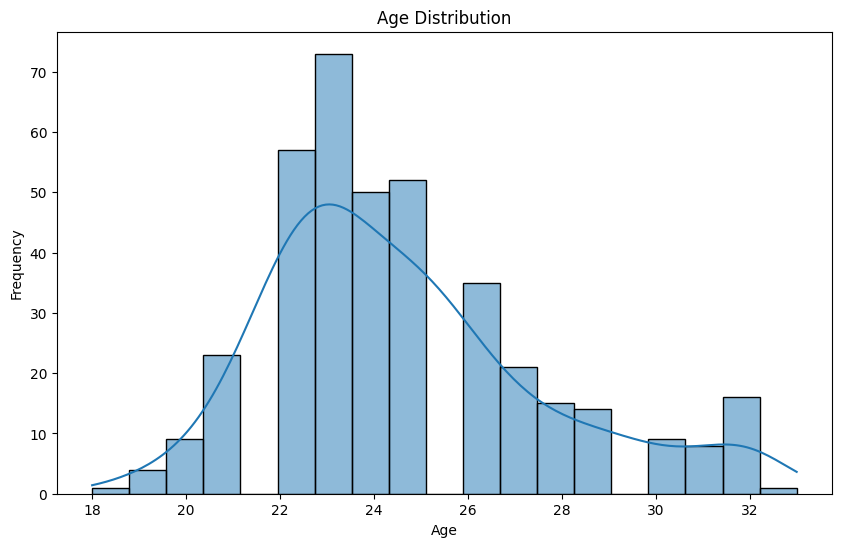

In [41]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)  # Plot the distribution of 'Age'
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The chart shows that the highest frequency of customers are aged between 22 and 25.

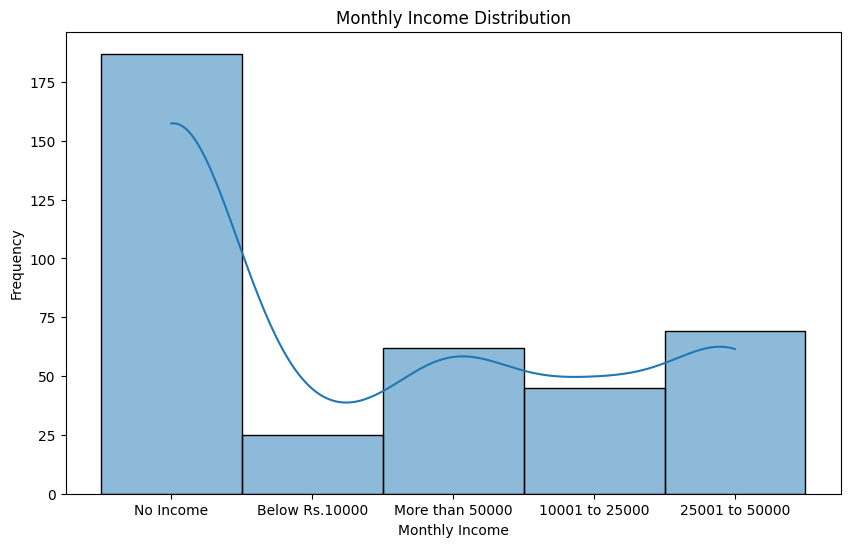

In [40]:
# Distribution of Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Income'], kde=True)  # Plot the distribution of 'Monthly Income'
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()


The chart shows that:

- No Income: Highest frequency, indicating many individuals have no income.
- Below Rs. 10000: Second highest frequency.
- 10001 to 25000: Moderate frequency.
- 25001 to 50000: Lower frequency.
- More than 50000: Lowest frequency.

The trend suggests that a significant portion of the customers earn lower incomes, with fewer individuals in higher income brackets.

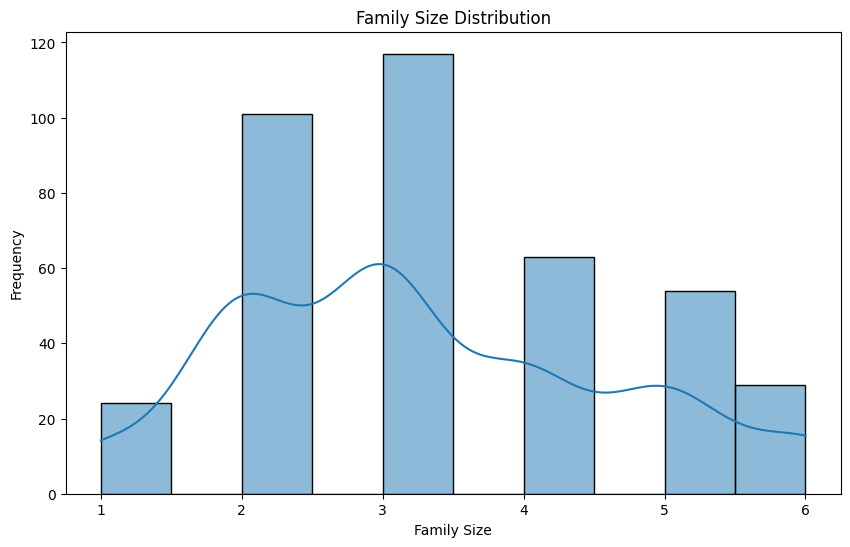

In [127]:
# Family Size Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Family size'], kde=True)  # Plot the distribution of 'Family Size'
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()


The bar graph shows that customers with three family members have the highest patronage, as indicated by the highest bar.

### Categorical Features

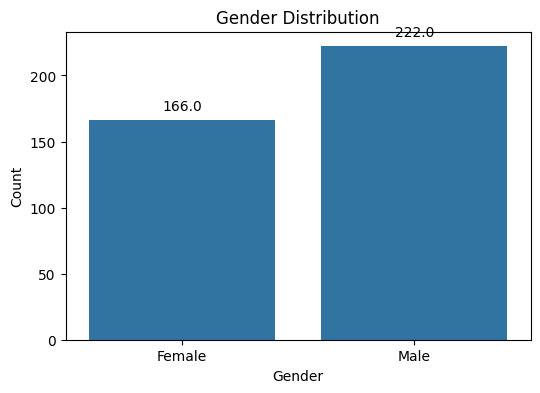

In [24]:
# Gender Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', data=df)  # Plot the count of each gender
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


The bar graph shows that there are more male customers (222) than female customers(166).

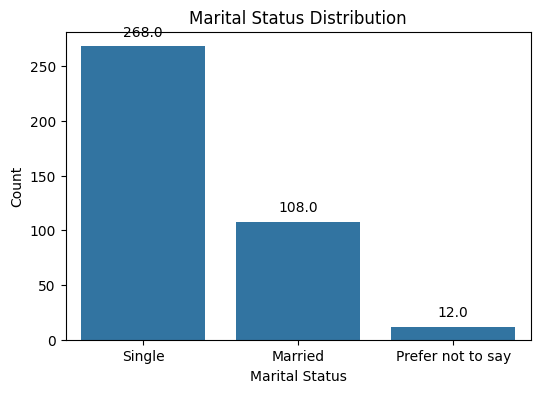

In [126]:
# Marital Status Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Marital Status', data=df)  # Plot the count of each marital status
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

The bar graph shows that the majority of customers are single (268), followed by married (108), and a small number prefer not to say (12).

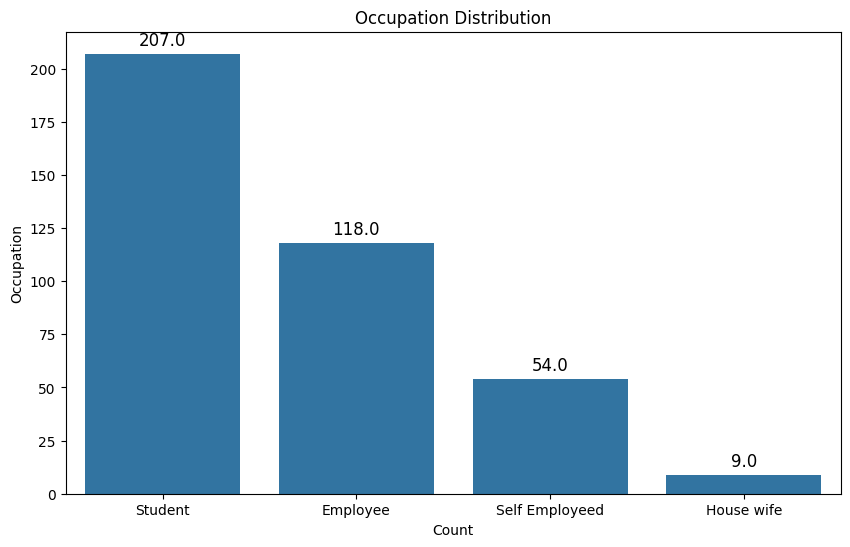

In [124]:
# Occupation Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Occupation', data=df)  # Plot the count of each occupation
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()

The bar chart shows that the majority of customers are students (207), followed by employees (118), self-employed (54), and housewives (9).

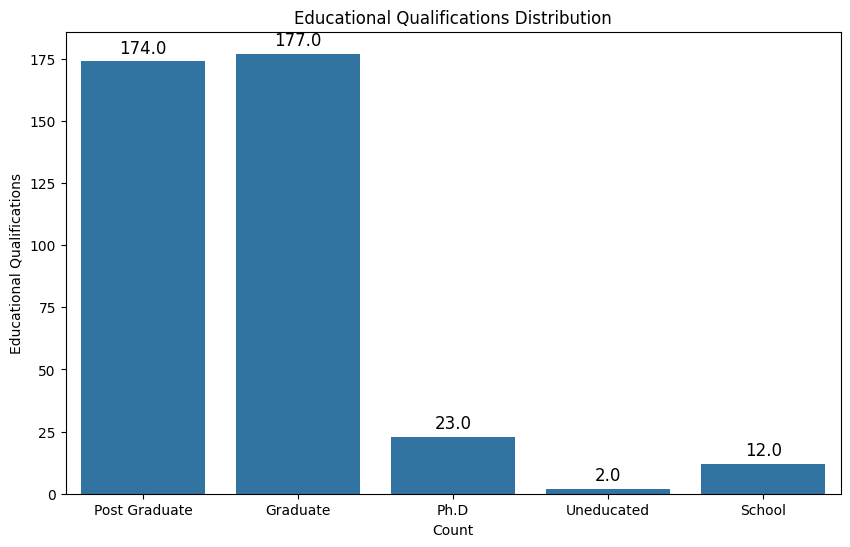

In [123]:
# Educational Qualifications Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Educational Qualifications', data=df)  # Plot the count of each occupation
plt.title('Educational Qualifications Distribution')
plt.xlabel('Count')
plt.ylabel('Educational Qualifications')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()

The bar graph shows that the majority of customers are graduates (177) and postgraduates (174), with significantly fewer customers in other categories like Ph.D., uneducated, and school-level.

## Bi-variate Analysis

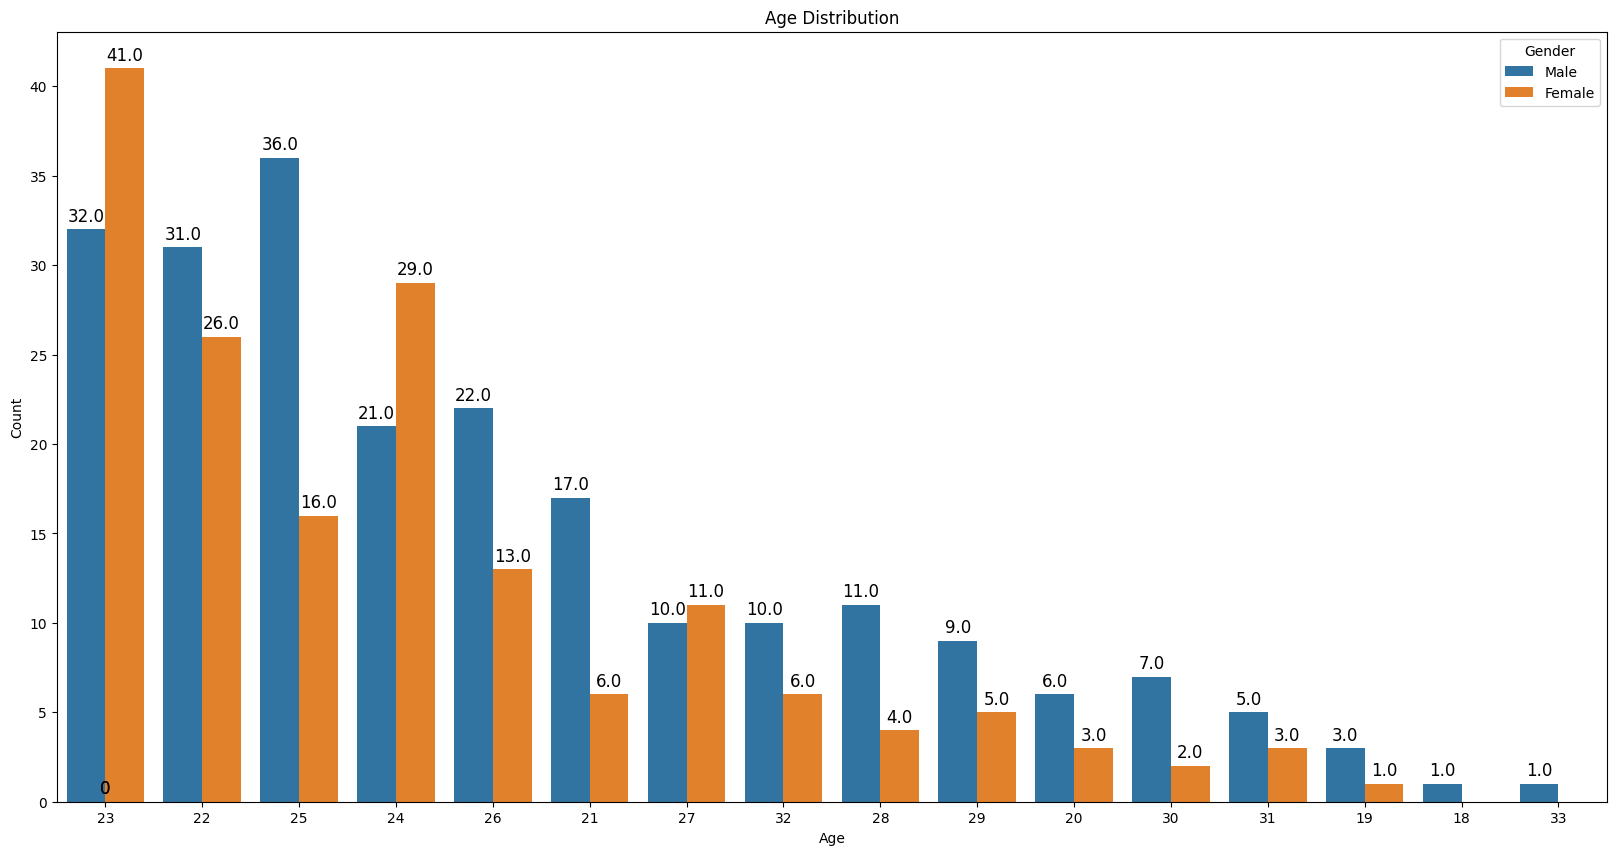

In [102]:
# Age Distribution
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Age', data=df, hue='Gender', order=df['Age'].value_counts().index)  # Plot the count of each Age
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()


Summary:

- Age Groups: The graph highlights that most customers fall within the age range of 22 to 25 years.
- Gender Comparison: Specifically, for age 22, there are 31 males and 26 females. For age 23, there are 32 males and 41 females. Age 24 has 21 males and 29 females, while age 25 has 36 males and 16 females.

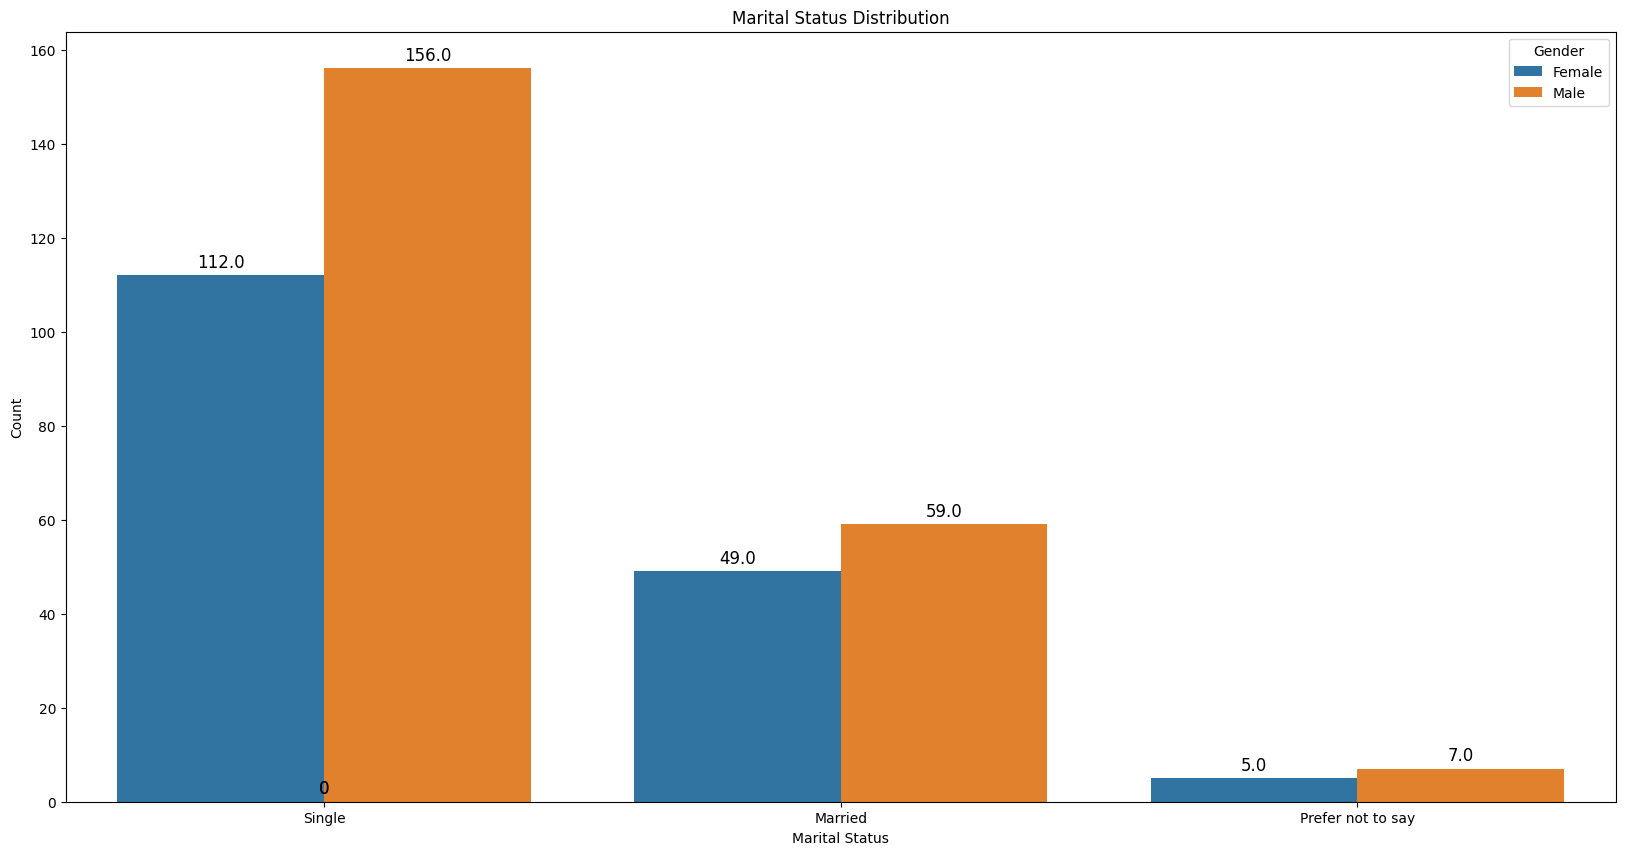

In [101]:
# Marital Status Distribution
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Marital Status', data=df, hue='Gender', order=df['Marital Status'].value_counts().index)  # Plot the count of each Marital Status
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()


The bar graph shows that the majority of customers are single, with 156 males and 112 females. The married category has 59 males and 49 females, while the “Prefer not to say” category has 7 males and 5 females, indicating a higher number of single customers compared to other marital statuses.

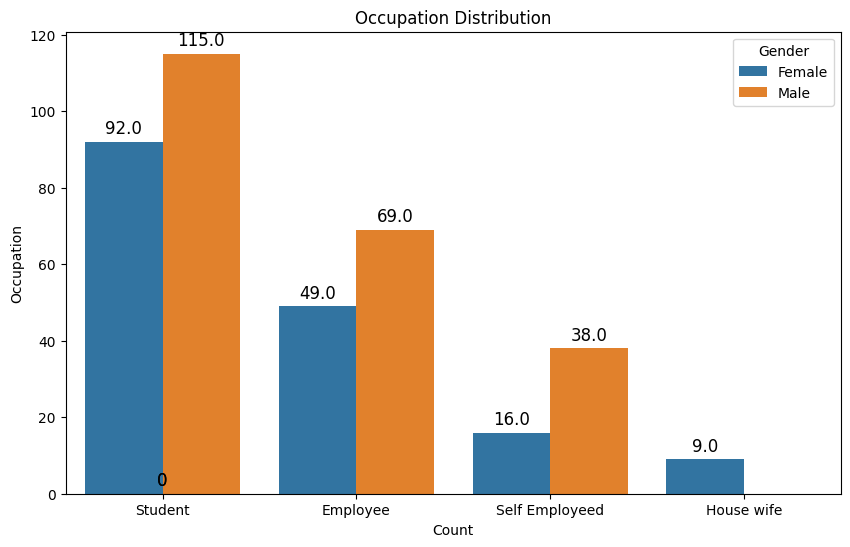

In [121]:
# Occupation Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Occupation', data=df, hue='Gender', order=df['Occupation'].value_counts().index)  # Plot the count of each occupation
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()

The bar graph shows that the majority of customers are students, with 115 males and 92 females. The employee category has 69 males and 49 females, while the self-employed category has 38 males and 16 females, and the housewife category has 9 females and no males.

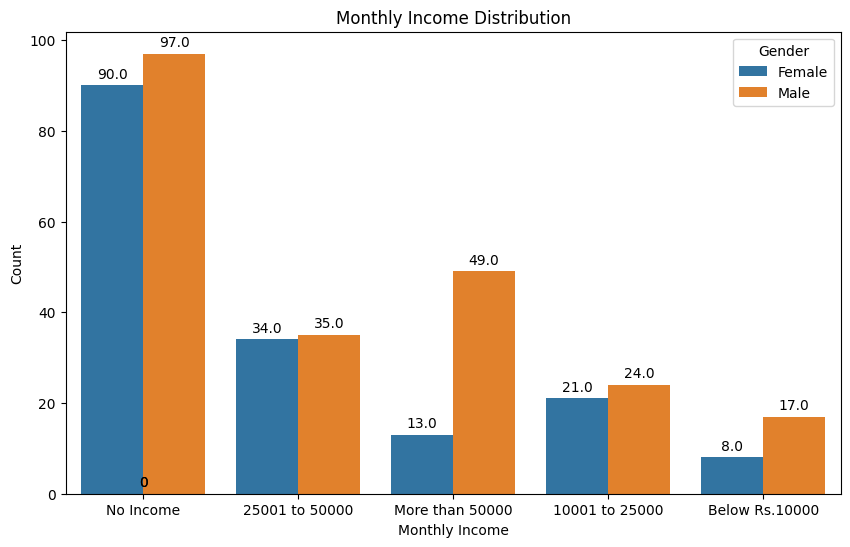

In [105]:
# Monthly Income Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Monthly Income', data=df, hue='Gender', order=df['Monthly Income'].value_counts().index)  # Plot the count of each Monthly Income
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()


The bar graph shows the count of customers in different income ranges, categorized by gender. It highlights that the highest number of customers fall within the “No Income” range, with majority being male.

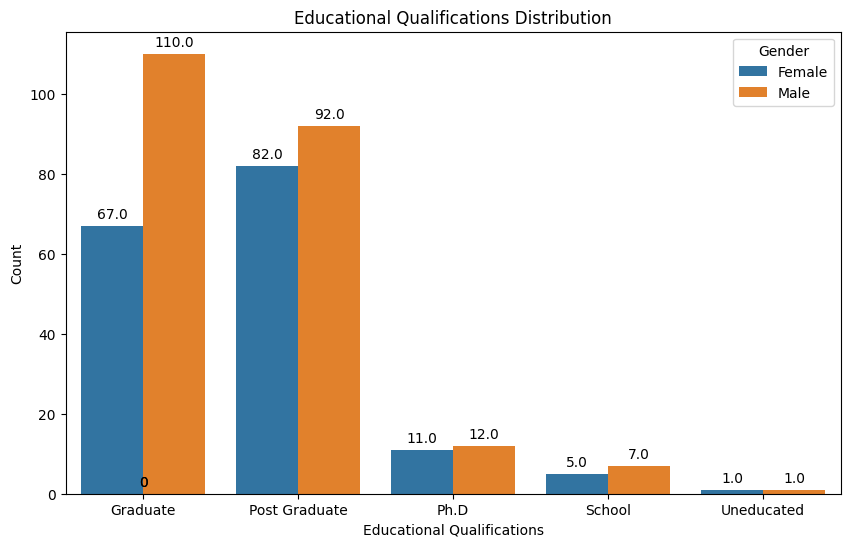

In [114]:
# Educational Qualifications Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Educational Qualifications', data=df, hue='Gender', order=df['Educational Qualifications'].value_counts().index)  # Plot the count of each educational qualification
plt.title('Educational Qualifications Distribution')
plt.xlabel('Educational Qualifications')
plt.ylabel('Count')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()


The bar graph shows that the majority of customers are graduates, with 110 males and 67 females. The post-graduate category has 82 females and 92 males, while the Ph.D., school, and uneducated categories have fewer individuals, with males being more represented in these categories.

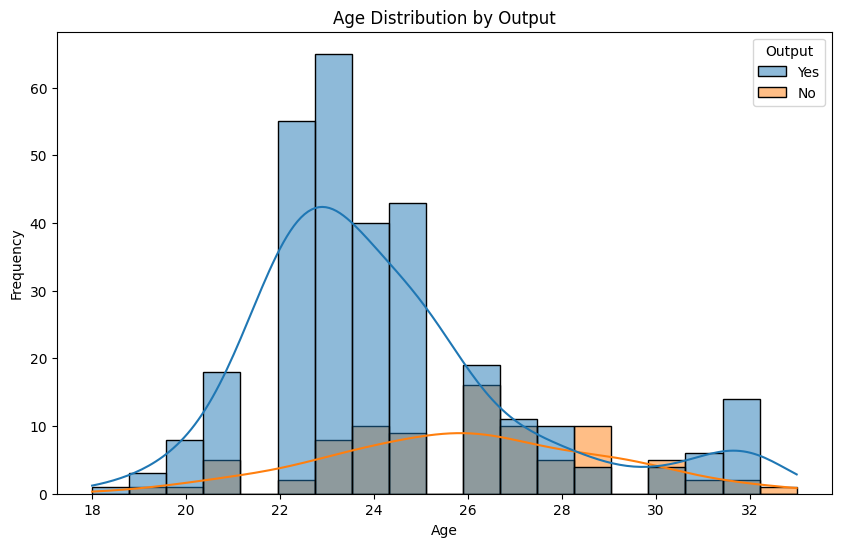

In [46]:
# Distribution of Age with respect to Output
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Output', kde=True)  # Plot the distribution of 'Age' with respect to 'Output'
plt.title('Age Distribution by Output')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows the age distribution of customers who either order again (Yes) or not (No). The density plots overlaying the histogram indicate that the ‘Yes’ category has a higher concentration of customers in the younger age range (22 to 25 years), while the ‘No’ category is more evenly distributed across ages.

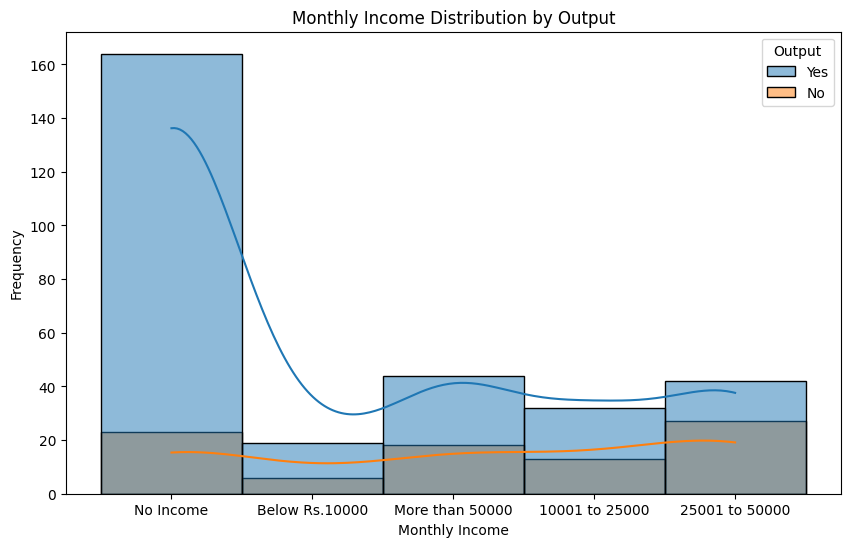

In [48]:
# Distribution of Monthly Income with respect to Output
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly Income', hue='Output', kde=True)  # Plot the distribution of 'Monthly Income' with respect to 'Output'
plt.title('Monthly Income Distribution by Output')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

The bar and line graph shows that the ‘No Income’ category of customers has the highest frequency of ‘No’. Other income categories have a more balanced distribution between ‘Yes’ and ‘No’, indicating varying levels of continous order based on income.

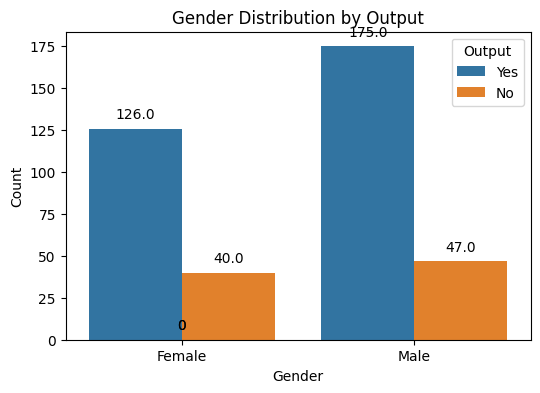

In [49]:
# Distribution of Gender with respect to Output
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', hue='Output', data=df)  # Plot the count of each gender with respect to 'Output'
plt.title('Gender Distribution by Output')
plt.xlabel('Gender')
plt.ylabel('Count')
# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


The bar chart shows that 126 females and 175 males ordered again (Yes), while 40 females and 47 males did not (No).

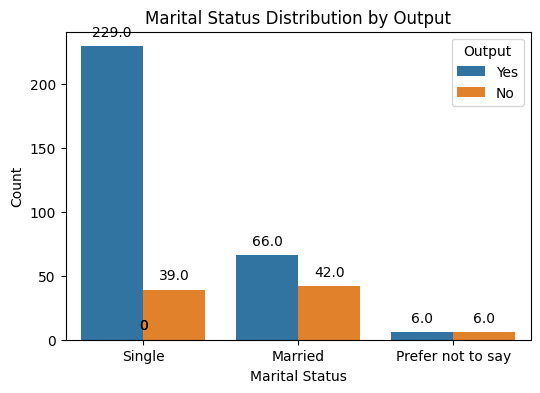

In [50]:
# Distribution of Marital Status with respect to Output
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Marital Status', hue='Output', data=df)  # Plot the count of each marital status with respect to 'Output'
plt.title('Marital Status Distribution by Output')
plt.xlabel('Marital Status')
plt.ylabel('Count')
# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

The bar chart shows that single customers ordered again, with 229 ‘Yes’ responses compared to 39 ‘No’ responses. Married customers have a closer distribution, with 66 ‘Yes’ and 42 ‘No’ responses, while those who prefer not to say have equal counts of 6 for both ‘Yes’ and ‘No’ responses.

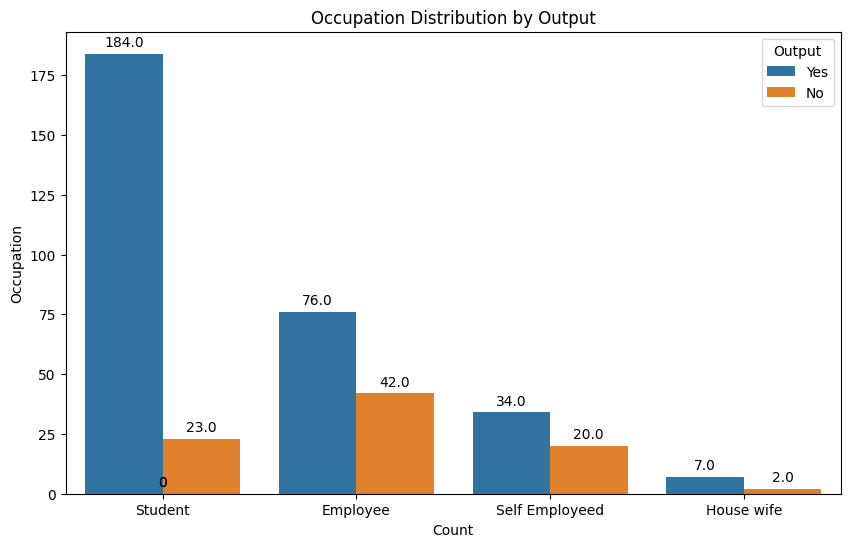

In [115]:
# Distribution of Occupation with respect to Output
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Occupation', hue='Output', data=df, order=df['Occupation'].value_counts().index)  # Plot the count of each occupation with respect to 'Output'
plt.title('Occupation Distribution by Output')
plt.xlabel('Count')
plt.ylabel('Occupation')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()

The bar chart shows that students are the most likely to reorder, with 184 ‘Yes’ responses compared to 76 ‘No’ responses. In contrast, housewives are the least likely to reorder, with only 7 ‘Yes’ and 2 ‘No’ responses.

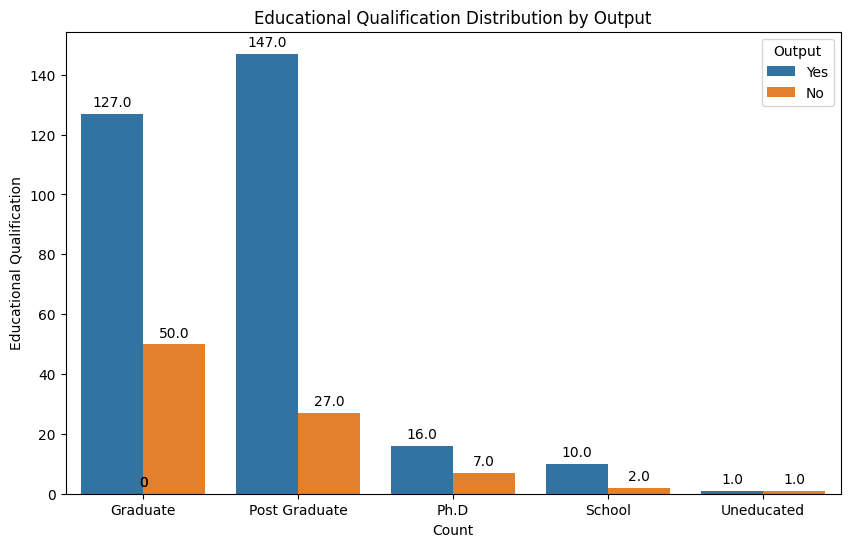

In [118]:
# Distribution of Educational Qualification with respect to Output
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Educational Qualifications', hue='Output', data=df, order=df['Educational Qualifications'].value_counts().index)  # Plot the count of each educational qualification with respect to 'Output'
plt.title('Educational Qualification Distribution by Output')
plt.xlabel('Count')
plt.ylabel('Educational Qualification')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()

The bar chart shows that individuals with ‘Graduate’ and ‘Post Graduate’ qualifications are more likely to order again, with higher counts for ‘Yes’ compared to ‘No’. Conversely, those with ‘Ph.D.’, ‘School’, and ‘Uneducated’ qualifications are less likely to reorder, as indicated by higher counts for ‘No’ in these categories.

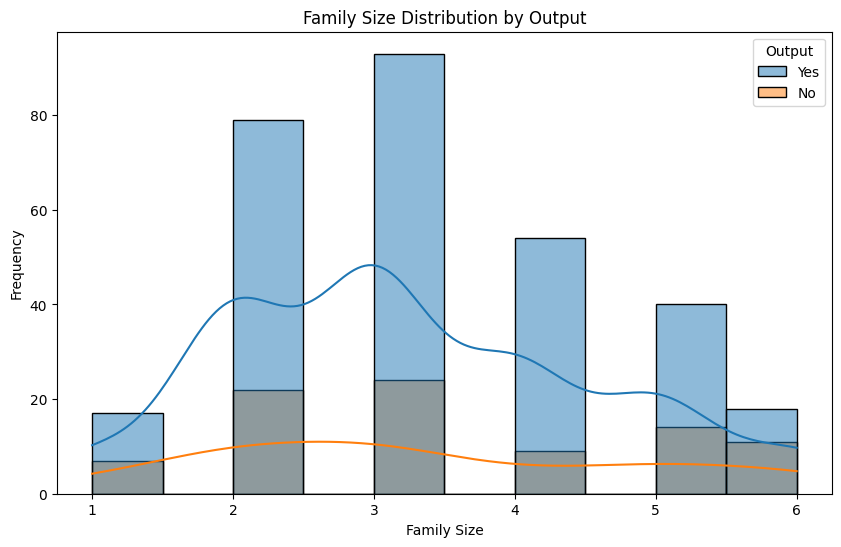

In [56]:
# Distribution of Family Size with respect to Output
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Family size', hue='Output', kde=True)  # Plot the distribution of 'Family Size' with respect to 'Output'
plt.title('Family Size Distribution by Output')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()


The graph shows that smaller family sizes are more likely to buy again (‘Yes’), as indicated by the higher frequency of blue bars. Conversely, larger family sizes tend to have a lower likelihood of repeat purchases, as seen by the decreasing height of blue bars with increasing family size.

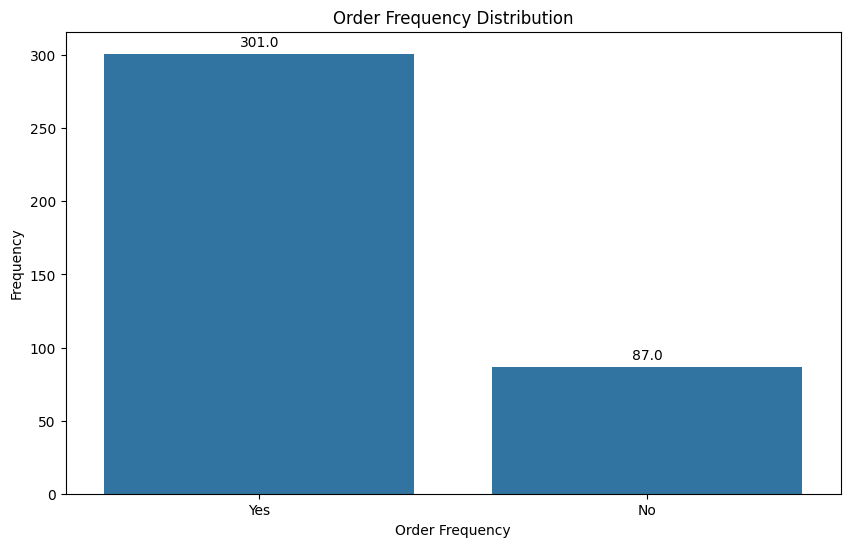

In [119]:
# Order Frequency
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Output', data=df)  # Plot the distribution of 'Order Frequency'
plt.title('Order Frequency Distribution')
plt.xlabel('Order Frequency')
plt.ylabel('Frequency')
# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.show()

The chart shows that a significantly higher number of customers buy again (‘Yes’) with a frequency of 301.0 compared to those who do not (‘No’) with a frequency of 87.0.

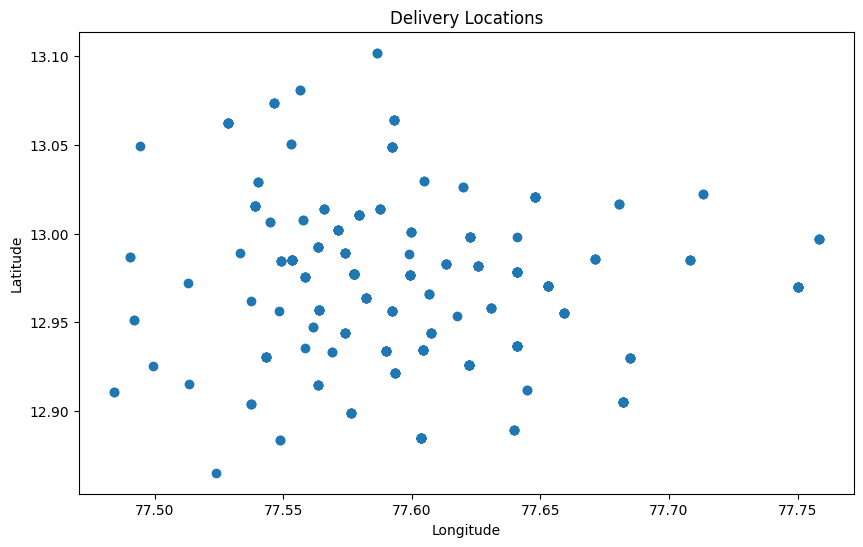

In [77]:
# Delivery Location (Latitude and Longitude)
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'])  # Scatter plot of delivery locations
plt.title('Delivery Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The scatter plot shows that delivery locations are clustered within a specific geographic area, with most points concentrated between longitudes 77.50 and 77.65 and latitudes 12.90 and 13.02. This suggests a high density of deliveries in this region.

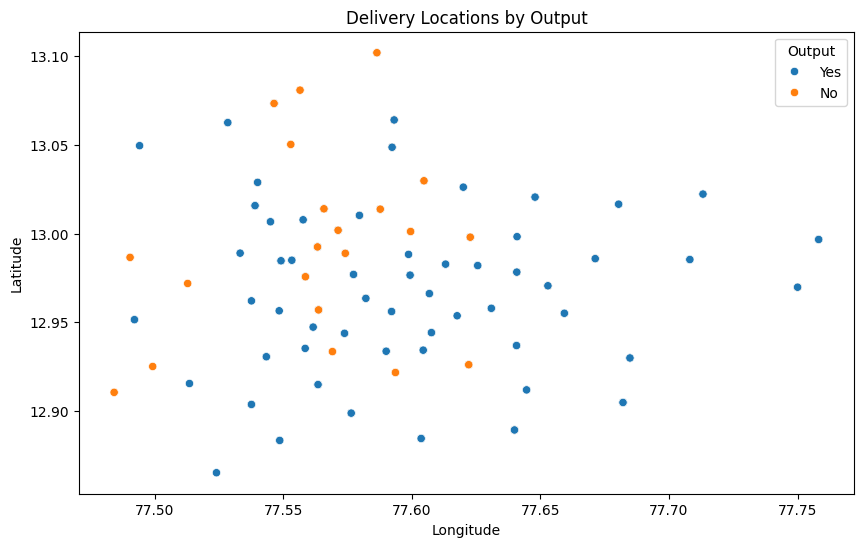

In [78]:
# Delivery Location with respect to Output
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Output', data=df)  # Scatter plot of delivery locations with respect to 'Output'
plt.title('Delivery Locations by Output')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The scatter plot shows that customers who buy again (‘Yes’) are more concentrated in specific geographic areas compared to those who do not (‘No’). Therefore, the output is ‘Yes’.

## **Summary of Findings from EDA:**

1. **Age Distribution**: 
   - Most customers are aged between 22 and 25 years.

2. **Income Distribution**: 
   - Majority of customers have no income, followed by those earning below Rs. 10,000.
   - There are fewer customers in higher income brackets.

3. **Family Size**:
   - Customers with three family members have the highest patronage.

4. **Gender Distribution**:
   - More male customers (222) than female customers (166).

5. **Marital Status**:
   - Most customers are single (268), followed by married (108), with a small number preferring not to disclose (12).

6. **Occupation**:
   - Majority of customers are students (207), followed by employees (118), self-employed (54), and housewives (9).

7. **Educational Qualification**:
   - Most customers are graduates (177) or postgraduates (174), with fewer in other categories like Ph.D., uneducated, and school-level.

8. **Detailed Insights**:
   - Gender comparison within age groups: Most customers aged 22-25 are balanced between males and females.
   - Marital status by gender: Single customers dominate, with 156 males and 112 females.
   - Occupation by gender: Majority of students are males, followed by employees, self-employed, and housewives (all female).
   - Income by gender: Highest number of customers with no income are males.
   - Educational qualification by gender: Graduates and postgraduates are the majority, with more males in other categories.

9. **Target Variable (Output) Analysis**:
   - Age: Younger customers (22-25) are more likely to reorder.
   - Income: 'No Income' customers have the highest 'No' responses, while other categories are more balanced.
   - Gender: More males and females reorder than not.
   - Marital status: Single customers are most likely to reorder, followed by married.
   - Occupation: Students are most likely to reorder; housewives are the least likely.
   - Educational qualification: Graduates and postgraduates are more likely to reorder; those with Ph.D., school-level, and uneducated qualifications are less likely.
   - Family size: Smaller family sizes are more likely to reorder.
   - Order frequency: More customers reorder compared to those who do not.

10. **Geographic Distribution**:
    - High density of deliveries in specific geographic areas (between longitudes 77.50 and 77.65 and latitudes 12.90 and 13.02).
    - Customers who reorder are more concentrated in specific areas compared to those who do not.